# Decision Tree Models for Classification

A decision tree is a tree-like model used in machine learning and data mining to help make decisions. 

In [1]:
import numpy as np; np.random.seed(50) 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(); sns.set_context("paper");

In [2]:
from sklearn import tree
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

## Understanding Classification Trees

Let's start by generating some data.

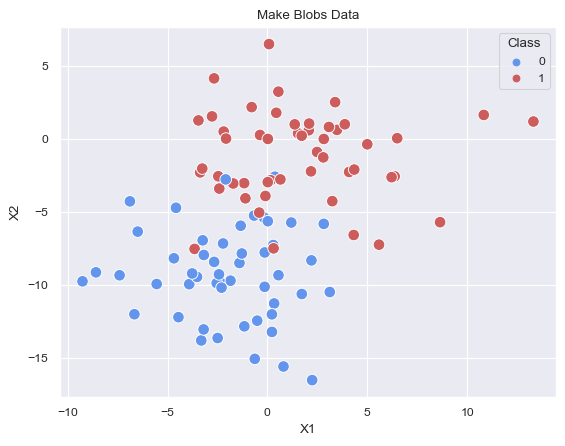

In [3]:
# The data
X, cl = make_blobs(n_samples=100, n_features=2, centers=2, random_state=2, cluster_std=3)
dfb = pd.DataFrame()
dfb['X1'] = X[:,0]
dfb['X2'] = X[:,1]
dfb['Class'] = cl
sns.scatterplot(x=dfb.X1, y=dfb.X2, s=70, hue=dfb.Class, palette=['cornflowerblue', 'indianred']).set_title("Make Blobs Data");

In [4]:
X = dfb[['X1','X2']]    # Feature Matrix
y = dfb.Class           # Target variable

In [5]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=23)
print('Train = %i cases \t Test = %i cases' %(len(X_train1), len(X_test1)))

Train = 80 cases 	 Test = 20 cases


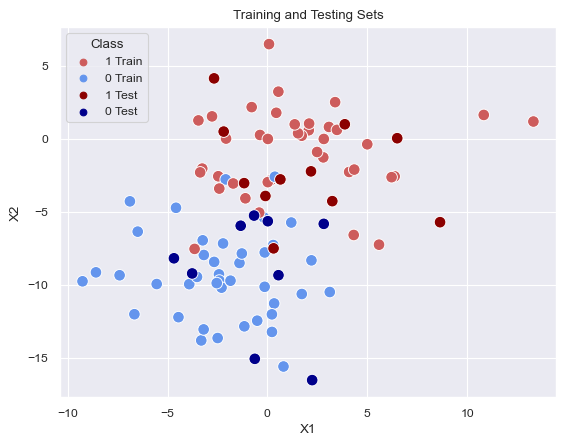

In [6]:
# Graphing the training and test sets
sns.scatterplot(x=X_train1.X1, y=X_train1.X2, s=70, hue=y_train1.replace({0:'0 Train', 1:'1 Train'}), 
                palette=['indianred', 'cornflowerblue'])
sns.scatterplot(x=X_test1.X1,  y=X_test1.X2,  s=70, hue=y_test1.replace({0:'0 Test', 1:'1 Test'}),    
                palette=['darkred', 'darkblue']).set_title("Training and Testing Sets");

In [7]:
# Saving training and testing data
data_train1 = pd.concat([X_train1, y_train1], axis=1)
data_test1  = pd.concat([X_test1, y_test1], axis=1)
data_train1.head()

,X1,X2,Class
85,-2.459759,-2.573120,1
28,1.194007,-5.736837,0
8,-3.239853,-6.954107,0
11,4.999948,-0.385664,1
63,0.080990,6.462332,1


### Decision Tree Model A

Let's create a decision tree with a maximum depth of 2 (`max_depth = 2`).

In [8]:
# Initializing a simple model with a maximum depth of 2
dt1 = tree.DecisionTreeClassifier(random_state=0, max_depth=2) 
dt1.fit(X_train1, y_train1)                     # Fitting the model

DecisionTreeClassifier(max_depth=2, random_state=0)

In [9]:
print('Training Set Score = %.3f' %dt1.score(X_train1, y_train1))
print('Testing Set  Score = %.3f' %dt1.score(X_test1, y_test1))

Training Set Score = 0.950
Testing Set  Score = 0.900


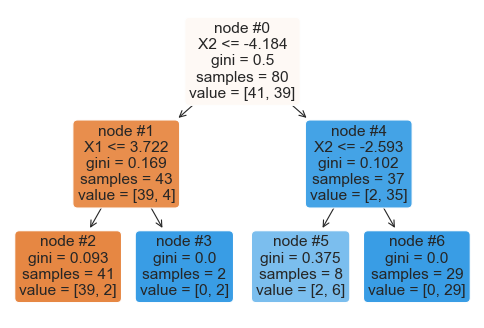

In [10]:
# Plot Tree with plot_tree
fig = plt.figure(figsize=(6, 4))
tree.plot_tree( dt1,
                feature_names=X_train1.columns,
                filled=True,
                node_ids=True,
                rounded=True                 
                );

The Classification Tree algorithm computes the metric Gini in each node. Gini is a measure of the degree of heterogeneity or diversity of a set of samples. 
- A node with a Gini impurity of 0 is completely pure, meaning all samples in the node belong to the same class. 
- A node with a Gini impurity of 1 is completely impure, meaning the samples in the node are evenly distributed among all classes.

- **node #0**: 
    - gini = 0.5 
    - samples = 80 (all training cases)
    - value = [41, 39] There are two classes: class 0 with 41 cases, and class 1 with 39.
    - The sample is split according to X2 < -4.184

- **node #1**: 
    - gini = 0.169 
    - samples = 43 
    - value = [39, 4] There are two classes: class 0 with 39 cases, and class 1 with 4.
    - The sample is split according to X1 < 3.722

    ...

- **node #3**: 
    - gini = 0.0 
    - samples = 2 
    - value = [0, 2] All cases in the node belong to class 1.
    - This node is the result of (X2 > -4.184) and (X1 > 3.722)

    ...

In [11]:
# Prediction 
data_train1['Class_predA'] = dt1.predict(X_train1)
data_test1['Class_predA']  = dt1.predict(X_test1)
data_train1.head()

,X1,X2,Class,Class_predA
85,-2.459759,-2.573120,1,1
28,1.194007,-5.736837,0,0
8,-3.239853,-6.954107,0,0
11,4.999948,-0.385664,1,1
63,0.080990,6.462332,1,1


### Decision Tree Model B

Let's create a decision model that determines the minimum number of samples required to be present in a leaf node of the tree.

`min_samples_leaf=10` means that a leaf node in the tree should have at least 10 samples to be created.

In [12]:
# Initializing a simple model with a maximum depth of 2
dt2 = tree.DecisionTreeClassifier(random_state=0, min_samples_leaf=10) 
dt2.fit(X_train1, y_train1)                     # Fitting the model

DecisionTreeClassifier(min_samples_leaf=10, random_state=0)

In [13]:
print('Training Set Score = %.3f' %dt2.score(X_train1, y_train1))
print('Testing Set  Score = %.3f' %dt2.score(X_test1, y_test1))

Training Set Score = 0.925
Testing Set  Score = 0.850


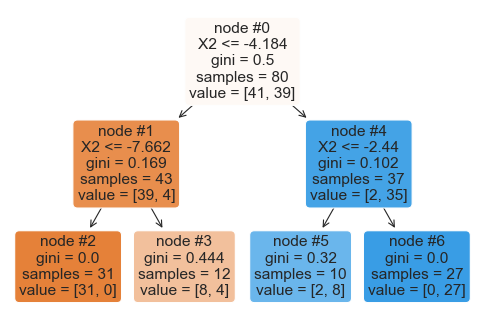

In [14]:
# Plot Tree with plot_tree
fig = plt.figure(figsize=(6, 4))
tree.plot_tree( dt2,
                feature_names=X_train1.columns,
                filled=True,
                node_ids=True,
                rounded=True                 
                );

In [15]:
# Prediction 
data_train1['Class_predB'] = dt2.predict(X_train1)
data_test1['Class_predB']  = dt2.predict(X_test1)
data_train1.head()

,X1,X2,Class,Class_predA,Class_predB
85,-2.459759,-2.573120,1,1,1
28,1.194007,-5.736837,0,0,0
8,-3.239853,-6.954107,0,0,0
11,4.999948,-0.385664,1,1,1
63,0.080990,6.462332,1,1,1


### Comparing the two models

In [16]:
# Generating new data
new_data = pd.DataFrame()
new_data['X1'] = np.random.uniform(data_train1.X1.min(), data_train1.X1.max(), size=1000)
new_data['X2'] = np.random.uniform(data_train1.X2.min(), data_train1.X2.max(), size=1000)
new_Class_predA  = dt1.predict(new_data)
new_Class_predB  = dt2.predict(new_data)
new_data['Class_predA'] = new_Class_predA
new_data['Class_predB'] = new_Class_predB

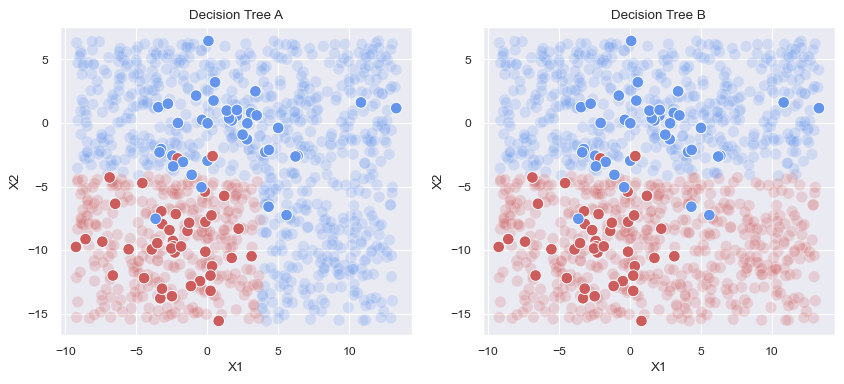

In [17]:
# Plotting boundaries
plt.figure(figsize=(10, 4))

plt.subplot(121)
sns.scatterplot(x=new_data.X1,  y=new_data.X2, s=70, hue=new_data.Class_predA, alpha=0.2, palette=['indianred', 'cornflowerblue'], 
                legend=False).set_title("Decision Tree A")
sns.scatterplot(x=X_train1.X1, y=X_train1.X2, s=70, hue=y_train1, palette=['indianred', 'cornflowerblue'], legend=False);

plt.subplot(122)
sns.scatterplot(x=new_data.X1,  y=new_data.X2, s=70, hue=new_data.Class_predB, alpha=0.2, palette=['indianred', 'cornflowerblue'], 
                legend=False).set_title("Decision Tree B")
sns.scatterplot(x=X_train1.X1, y=X_train1.X2, s=70, hue=y_train1, palette=['indianred', 'cornflowerblue'], legend=False);

In [18]:
# Confusion Matrix for model A
confusion_matrix(y_true=data_test1.Class,            # True labels
                 y_pred=data_test1.Class_predA)      # Predicted labels

array([[9, 0],
       [2, 9]], dtype=int64)

In [19]:
# Confusion Matrix for model B
confusion_matrix(y_true=data_test1.Class,            # True labels
                 y_pred=data_test1.Class_predB)      # Predicted labels

array([[9, 0],
       [3, 8]], dtype=int64)

In [20]:
# The accuracy
print('Training Set (Model A) Accuracy = %.2f %%' %(dt1.score(X=X_train1, y=y_train1)*100))
print('Testing Set  (Model A) Accuracy = %.2f %%' %(dt1.score(X=X_test1,  y=y_test1)*100))
print('-----')
print('Training Set (Model B) Accuracy = %.2f %%' %(dt2.score(X=X_train1, y=y_train1)*100))
print('Testing Set  (Model B) Accuracy = %.2f %%' %(dt2.score(X=X_test1,  y=y_test1)*100))

Training Set (Model A) Accuracy = 95.00 %
Testing Set  (Model A) Accuracy = 90.00 %
-----
Training Set (Model B) Accuracy = 92.50 %
Testing Set  (Model B) Accuracy = 85.00 %


## Decision Tree: The Raisin Dataset

The dataset contains information about two varieties of raisins (Kecimen and Besni) grown in Turkey.

In [21]:
dfr = pd.read_csv('Raisin.csv')
print(dfr.shape)
dfr.head()

(900, 8)


,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


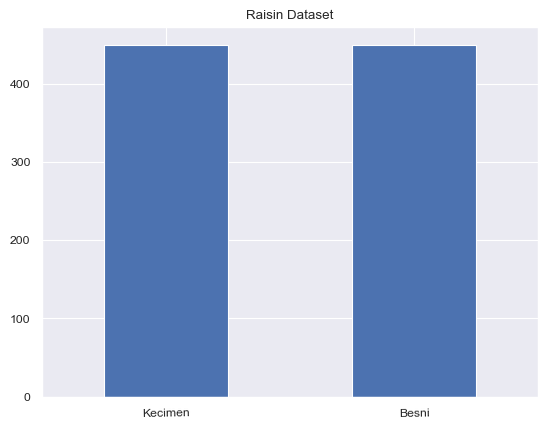

In [22]:
dfr.Class.value_counts().plot(kind='bar', rot=True, title='Raisin Dataset');

In [23]:
# Recoding the class variable
label_to_number = {'Kecimen': 0, 'Besni': 1}
dfr['Besni'] = dfr['Class'].map(label_to_number)
dfr.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class,Besni
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen,0
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen,0
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen,0
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen,0
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen,0


In [24]:
yr = dfr.Besni                              # Target variable
Xr = dfr.drop(['Class','Besni'], axis=1)    # Feature Matrix
Xr.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251


Decision trees do not require standardization of variables as they are not affected by linear transformations of the input features.

In [25]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, test_size=0.2, random_state=23)
print('Train = %i cases \t Test = %i cases' %(len(Xr_train), len(Xr_test)))

Train = 720 cases 	 Test = 180 cases


In [26]:
# Saving training and testing data
data_train_r = pd.concat([Xr_train, yr_train], axis=1)
data_test_r =  pd.concat([Xr_test, yr_test], axis=1)
data_train_r.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Besni
516,202118,684.602958,379.719282,0.832080,209242,0.717219,1827.900,1
502,71639,400.413959,231.620142,0.815717,76252,0.642462,1101.879,1
535,77012,425.219427,239.469561,0.826343,81325,0.654280,1131.530,1
151,57980,336.312888,222.609766,0.749581,59311,0.777295,925.795,0
292,72219,376.650492,249.529454,0.749065,74373,0.777795,1050.221,0


### Raisin Decision Tree Model A

We will create a decision tree model with at least `min_samples_leaf` observations in each leaf node.

In [27]:
min_samples_leaf = 50
dtA = tree.DecisionTreeClassifier(random_state=0, min_samples_leaf = min_samples_leaf) 
dtA.fit(Xr_train, yr_train)

DecisionTreeClassifier(min_samples_leaf=50, random_state=0)

In [28]:
print('Raisin Training Set Score = %.3f' %dtA.score(Xr_train, yr_train))
print('Raisin Testing Set  Score = %.3f' %dtA.score(Xr_test, yr_test))

Raisin Training Set Score = 0.868
Raisin Testing Set  Score = 0.844


In [29]:
# Prediction 
data_train_r['Bensi_predA'] = dtA.predict(Xr_train)
data_test_r['Bensi_predA']  = dtA.predict(Xr_test)
data_test_r.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Besni,Bensi_predA
774,76624,473.965993,207.736989,0.898831,80356,0.661008,1205.819,1,1
737,48007,302.611047,209.116084,0.722817,50679,0.677051,889.743,1,0
753,79057,436.390047,236.895393,0.839828,82642,0.654597,1148.146,1,1
890,85646,469.774755,238.539384,0.861490,92673,0.681044,1226.892,1,1
428,48093,329.935742,187.041722,0.823784,49367,0.745108,858.386,0,0


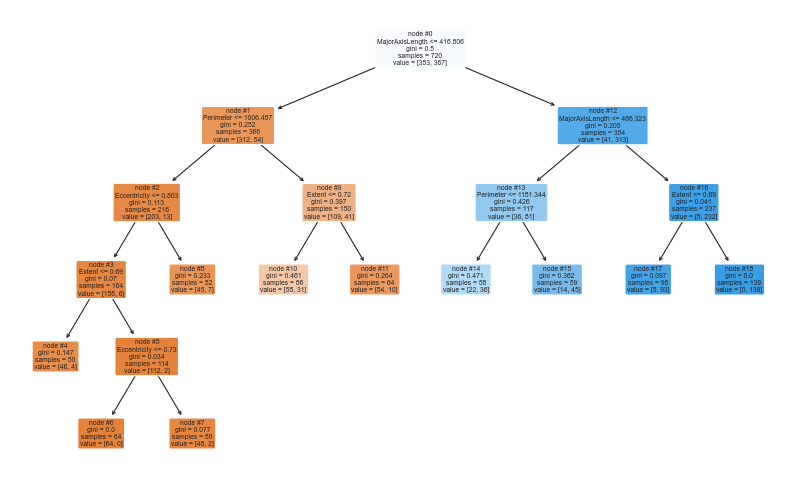

In [30]:
# Plot Tree with plot_tree
fig = plt.figure(figsize=(10, 6))
tree.plot_tree( dtA,
                feature_names=Xr_train.columns,
                filled=True,
                node_ids=True,
                rounded=True                 
                );

### Raisin Decision Tree Model B

We will create a decision tree model that considers split nodes with more than `min_samples_split` observations.

In [31]:
min_samples_split = 100
dtB = tree.DecisionTreeClassifier(random_state=0, min_samples_split = min_samples_split) 
dtB.fit(Xr_train, yr_train)

DecisionTreeClassifier(min_samples_split=100, random_state=0)

In [32]:
print('Raisin Training Set Score = %.3f' %dtB.score(Xr_train, yr_train))
print('Raisin Testing Set  Score = %.3f' %dtB.score(Xr_test, yr_test))

Raisin Training Set Score = 0.881
Raisin Testing Set  Score = 0.861


In [33]:
# Prediction 
data_train_r['Bensi_predB'] = dtB.predict(Xr_train)
data_test_r['Bensi_predB']  = dtB.predict(Xr_test)
data_test_r.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Besni,Bensi_predA,Bensi_predB
774,76624,473.965993,207.736989,0.898831,80356,0.661008,1205.819,1,1,1
737,48007,302.611047,209.116084,0.722817,50679,0.677051,889.743,1,0,0
753,79057,436.390047,236.895393,0.839828,82642,0.654597,1148.146,1,1,1
890,85646,469.774755,238.539384,0.861490,92673,0.681044,1226.892,1,1,1
428,48093,329.935742,187.041722,0.823784,49367,0.745108,858.386,0,0,0


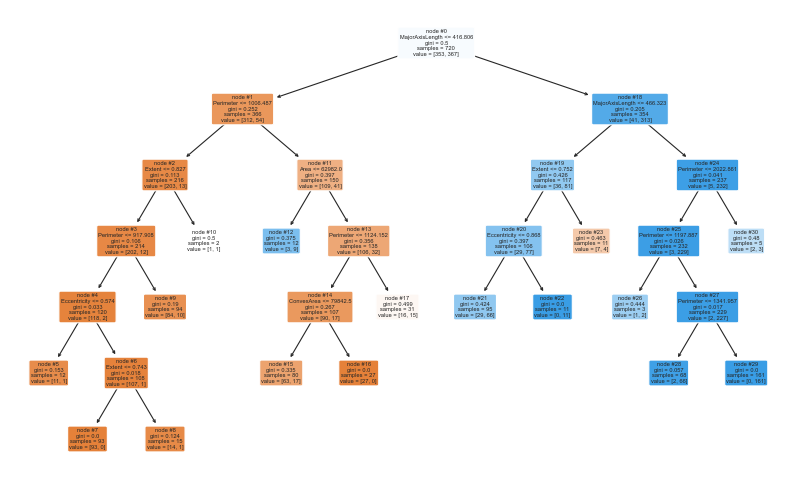

In [34]:
# Plot Tree with plot_tree
fig = plt.figure(figsize=(10, 6))
tree.plot_tree( dtB,
                feature_names=Xr_train.columns,
                filled=True,
                node_ids=True,
                rounded=True                 
                );

### Raisin Decision Tree Model C

We will create a decision tree model with maximum depth of `max_depth`.

In [35]:
max_depth = 4
dtC = tree.DecisionTreeClassifier(random_state=0, max_depth = max_depth) 
dtC.fit(Xr_train, yr_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [36]:
print('Raisin Training Set Score = %.3f' %dtC.score(Xr_train, yr_train))
print('Raisin Testing Set  Score = %.3f' %dtC.score(Xr_test, yr_test))

Raisin Training Set Score = 0.889
Raisin Testing Set  Score = 0.856


In [37]:
# Prediction 
data_train_r['Bensi_predC'] = dtC.predict(Xr_train)
data_test_r['Bensi_predC']  = dtC.predict(Xr_test)
data_test_r.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Besni,Bensi_predA,Bensi_predB,Bensi_predC
774,76624,473.965993,207.736989,0.898831,80356,0.661008,1205.819,1,1,1,1
737,48007,302.611047,209.116084,0.722817,50679,0.677051,889.743,1,0,0,0
753,79057,436.390047,236.895393,0.839828,82642,0.654597,1148.146,1,1,1,1
890,85646,469.774755,238.539384,0.861490,92673,0.681044,1226.892,1,1,1,1
428,48093,329.935742,187.041722,0.823784,49367,0.745108,858.386,0,0,0,0


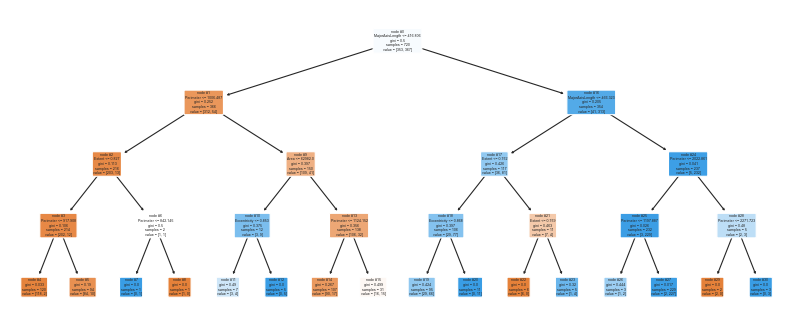

In [38]:
# Plot Tree with plot_tree
fig = plt.figure(figsize=(10, 4))
tree.plot_tree( dtC,
                feature_names=Xr_train.columns,
                filled=True,
                node_ids=True,
                rounded=True                 
                );

### Looking for a better model 

In [39]:
# Define the hyperparameters to be tuned
param_grid = {
    'min_samples_leaf': [10, 50, 80],
    'min_samples_split': [10, 50, 100],
    'max_depth': [None, 2, 6, 8]
}

In [40]:
dt = tree.DecisionTreeClassifier(random_state=0)

In [41]:
grid_search = GridSearchCV(dt, param_grid, cv=5)
grid_search.fit(Xr_train, yr_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [None, 2, 6, 8],
                         'min_samples_leaf': [10, 50, 80],
                         'min_samples_split': [10, 50, 100]})

In [42]:
print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'max_depth': None, 'min_samples_leaf': 50, 'min_samples_split': 10}


In [43]:
grid_search.best_params_['max_depth']

In [44]:
# Creating a model with the best parameters
dt_best = tree.DecisionTreeClassifier(random_state=0, 
                    max_depth = grid_search.best_params_['max_depth'],
                    min_samples_leaf = grid_search.best_params_['min_samples_leaf'],
                    min_samples_split = grid_search.best_params_['min_samples_split']
                    )

In [45]:
dt_best.fit(Xr_train, yr_train)

DecisionTreeClassifier(min_samples_leaf=50, min_samples_split=10,
                       random_state=0)

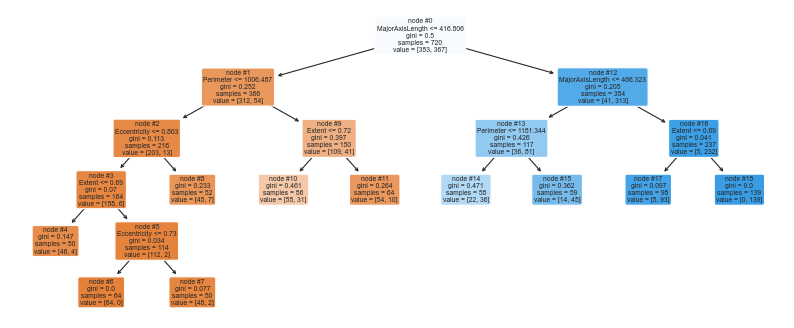

In [46]:
# Plot Tree with plot_tree
fig = plt.figure(figsize=(10, 4))
tree.plot_tree( dt_best,
                feature_names=Xr_train.columns,
                filled=True,
                node_ids=True,
                rounded=True                 
                );

In [47]:
# Print the accuracy score of the best model on training and testing sets
print("Accuracy on training cases = %.4f" %dt_best.score(Xr_train, yr_train))
print("Accuracy on testing cases  = %.4f" %dt_best.score(Xr_test, yr_test))

Accuracy on training cases = 0.8681
Accuracy on testing cases  = 0.8444


## References

- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor
- https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html
- VanderPlas, J. (2017) Python Data Science Handbook: Essential Tools for Working with Data. USA: O’Reilly Media, Inc, chapter 5